In [1]:
from WindPy import w
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!
You can use w.menu to help yourself to create commands(WSD,WSS,WST,WSI,WSQ,...)!

COPYRIGHT (C) 2016 WIND HONGHUI INFORMATION & TECHKNOLEWDGE CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
data = w.wsi("510050.SH", "high,low", "2017-05-18 09:00:00", "2017-05-18 16:09:18")

In [4]:
data

.ErrorCode=0
.Codes=[510050.SH]
.Fields=[high,low]
.Times=[20170518 09:25:00,20170518 09:30:00,20170518 09:31:00,20170518 09:32:00,20170518 09:33:00,20170518 09:34:00,20170518 09:35:00,20170518 09:36:00,20170518 09:37:00,20170518 09:38:00,...]
.Data=[[2.347,2.351,2.353,2.353,2.353,2.353,2.353,2.354,2.356,2.357,...],[2.347,2.345,2.352,2.352,2.352,2.352,2.352,2.352,2.353,2.356,...]]

In [5]:
def wind2df(raw_data):
    dic = {}
    for data, field in zip(raw_data.Data, raw_data.Fields):
        dic[str(field.lower())] = data
    return pd.DataFrame(dic, index=raw_data.Times)

In [6]:
df = wind2df(data)

In [7]:
df['spread'] = df['high'] - df['low']

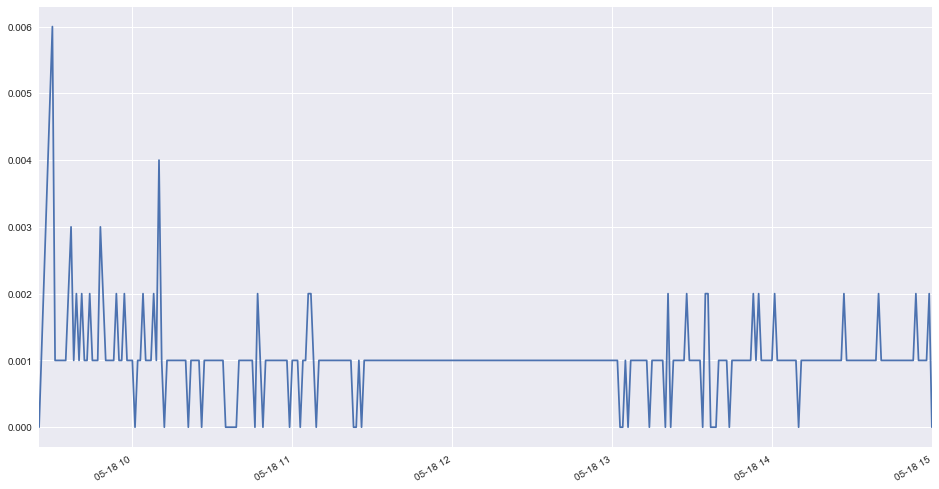

In [8]:
plt.figure(figsize=(16, 9))
df['spread'].plot()

<Container object of 242 artists>

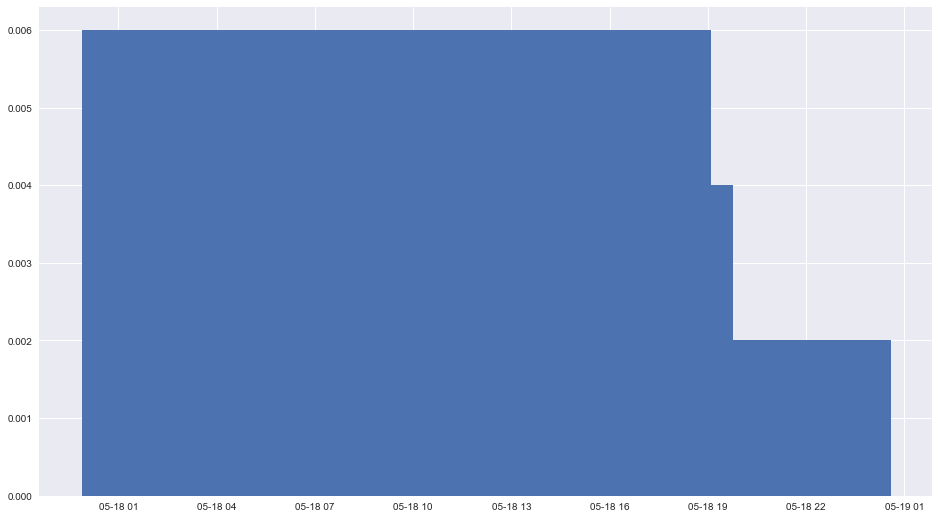

In [9]:
plt.figure(figsize=(16, 9))
plt.bar(df['spread'].index, df['spread'].values)